In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('data/imdb_dataset.csv')

df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,False,165000000,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,185000000,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,220000000,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [75]:
# Take a random 10% sample of the data
# df = df.sample(frac=0.1, random_state=42)

# Check the size of the subset
#print(f"Original dataset size: {len(df)}")

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

In [77]:
df.isnull().sum()

id                           0
title                       13
vote_average                 0
vote_count                   0
status                       0
release_date            181817
revenue                      0
runtime                      0
adult                        0
budget                       0
imdb_id                 488003
original_language            0
original_title              13
overview                215824
popularity                   0
tagline                 895847
genres                  414972
production_companies    568428
production_countries    463497
spoken_languages        440662
keywords                755954
dtype: int64

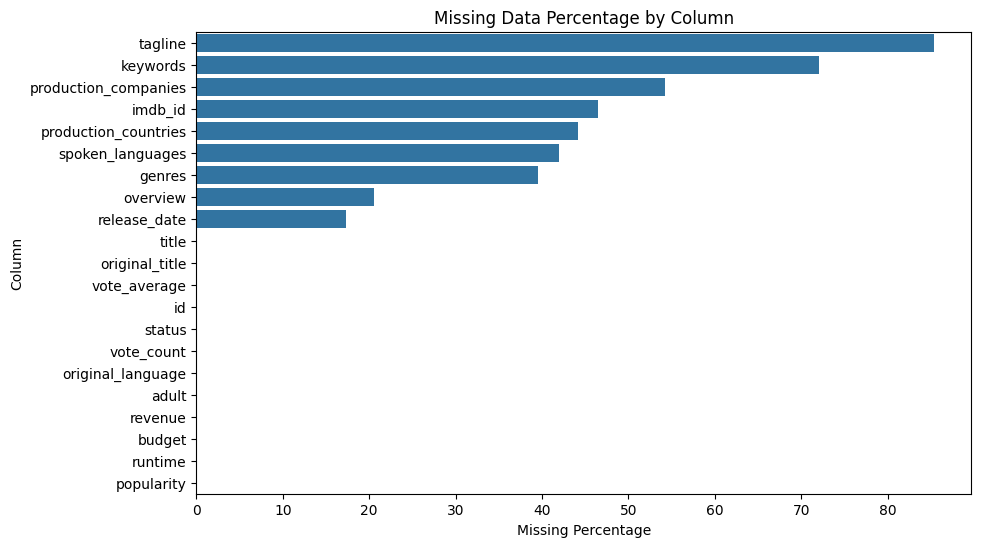

In [78]:
# Plot missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Column': missing_data.index, 'Missing Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Percentage', y='Column', data=missing_df)
plt.title('Missing Data Percentage by Column')
plt.show()


In [79]:
def drop_columns_with_missing_data(df, threshold=0.5):
    """
    Drops columns with more than a given percentage of missing data.

    Parameters:
    - df: The DataFrame to process
    - threshold: The percentage of missing data allowed (0.5 means 50%)

    Returns:
    - A new DataFrame with columns dropped.
    """
    # Calculate the percentage of missing data for each column
    missing_percentage = df.isnull().mean()

    # Identify columns exceeding the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index

    # Drop those columns
    df = df.drop(columns=columns_to_drop)

    return df, columns_to_drop

# Example usage
threshold = 0.5  # 20% missing data threshold
df, dropped_columns = drop_columns_with_missing_data(df, threshold=threshold)

# Display results
print(f"Columns dropped (more than {threshold*100}% missing data):")
print(dropped_columns)

Columns dropped (more than 50.0% missing data):
Index(['tagline', 'production_companies', 'keywords'], dtype='object')


In [80]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day
df = df.drop(columns=['release_date'])  # Drop the original datetime column

df = df[df['vote_count'] >= 20]
df = df[df['release_year'] <= 2025]

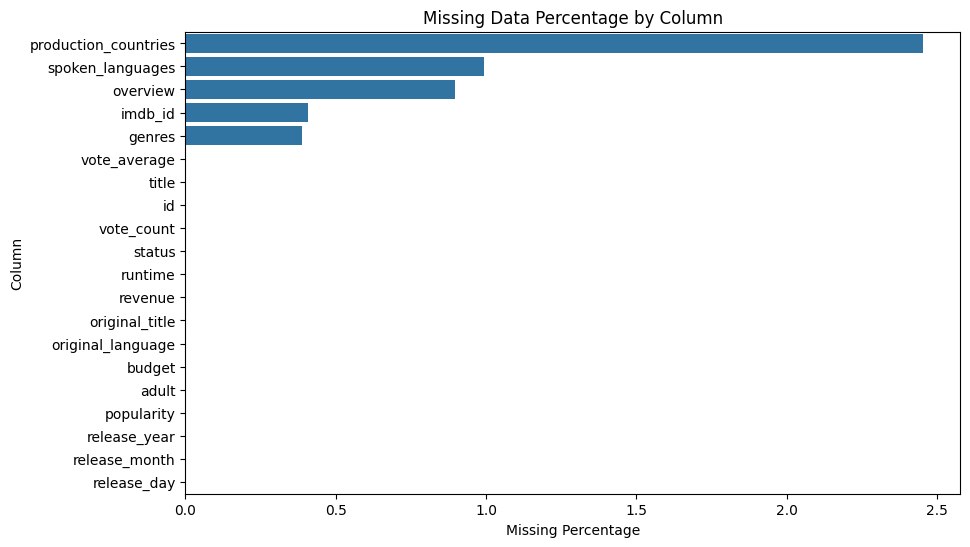

In [81]:
# Plot missing values
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Column': missing_data.index, 'Missing Percentage': missing_percentage})
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Missing Percentage', y='Column', data=missing_df)
plt.title('Missing Data Percentage by Column')
plt.show()


In [82]:
df['profit'] = df['revenue'] - df['budget']

In [83]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity,release_year,release_month,release_day,profit
count,5.022400e+04,50224.000000,50224.000000,5.022400e+04,50224.000000,5.022400e+04,50224.000000,50224.000000,50224.000000,50224.000000,5.022400e+04
mean,2.183368e+05,6.268035,405.274172,1.395569e+07,94.914603,5.178387e+06,10.148094,1999.021842,6.817338,15.230746,8.777307e+06
std,2.543947e+05,0.954675,1462.736129,7.496880e+07,32.909829,1.966039e+07,31.544434,23.306731,3.504016,8.920410,6.144052e+07
min,2.000000e+00,1.295000,20.000000,0.000000e+00,0.000000,0.000000e+00,0.600000,1900.000000,1.000000,1.000000,-1.995460e+08
25%,2.937975e+04,5.700000,31.000000,0.000000e+00,87.000000,0.000000e+00,3.646000,1989.000000,4.000000,8.000000,0.000000e+00
50%,7.866600e+04,6.347000,59.000000,0.000000e+00,96.000000,0.000000e+00,6.150000,2008.000000,7.000000,15.000000,0.000000e+00
75%,3.798818e+05,6.917000,180.000000,0.000000e+00,108.000000,3.725000e+01,10.814500,2016.000000,10.000000,23.000000,0.000000e+00
max,1.181678e+06,10.000000,34495.000000,2.923706e+09,960.000000,4.600000e+08,2994.357000,2023.000000,12.000000,31.000000,2.686706e+09


In [84]:
df.shape

(50224, 21)

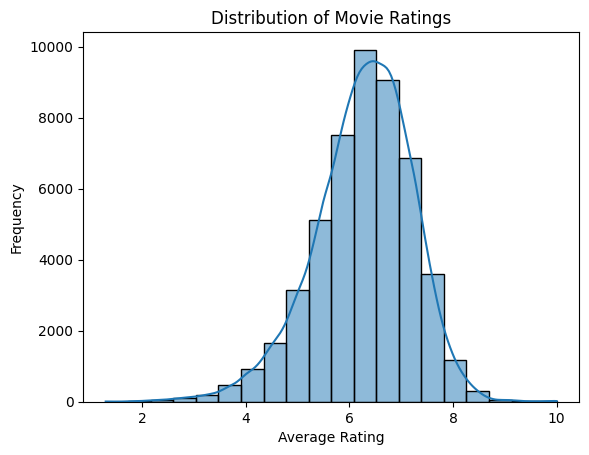

In [85]:
sns.histplot(df['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

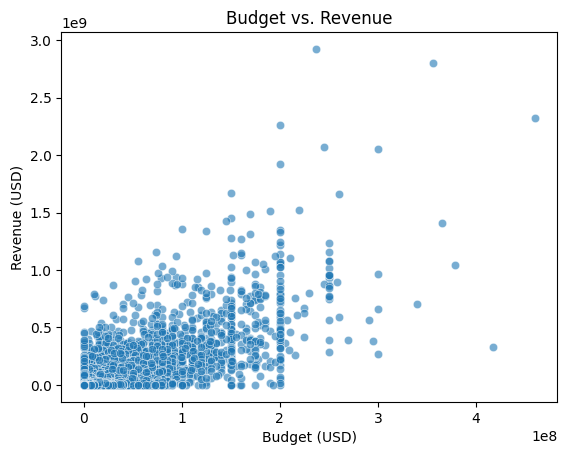

In [86]:
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.6)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget (USD)')
plt.ylabel('Revenue (USD)')
plt.show()

In [87]:
top_movies = df.nlargest(10, 'popularity')[['title', 'popularity']]
print(top_movies)

                  title  popularity
3873        Blue Beetle    2994.357
5048       Gran Turismo    2680.593
7921         The Nun II    1692.778
2129  Meg 2: The Trench    1567.273
9954        Retribution    1547.220
4015         Talk to Me    1458.514
1110             Fast X    1175.267
6397   Sound of Freedom    1111.036
825              Barbie    1069.340
1799          Elemental    1008.942


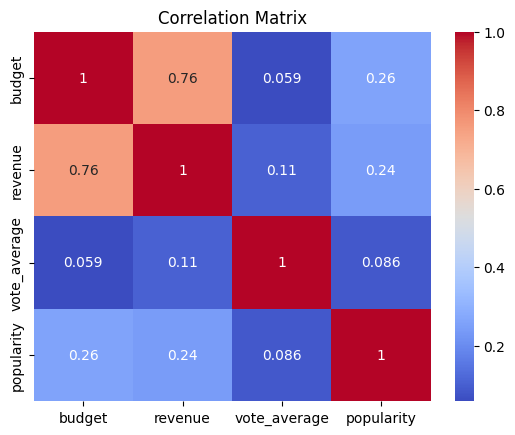

In [88]:
correlation = df[['budget', 'revenue', 'vote_average', 'popularity']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [89]:
top_profitable_movies = df.nlargest(10, 'profit')[['title', 'profit']]
print(top_profitable_movies)

                            title      profit
3                          Avatar  2686706026
15              Avengers: Endgame  2444000000
17                        Titanic  2064162353
282      Avatar: The Way of Water  1860250281
56   Star Wars: The Force Awakens  1823223624
6          Avengers: Infinity War  1752415039
57        Spider-Man: No Way Home  1721847111
44                 Jurassic World  1521537444
317                 The Lion King  1403075401
271                     Furious 7  1325341399


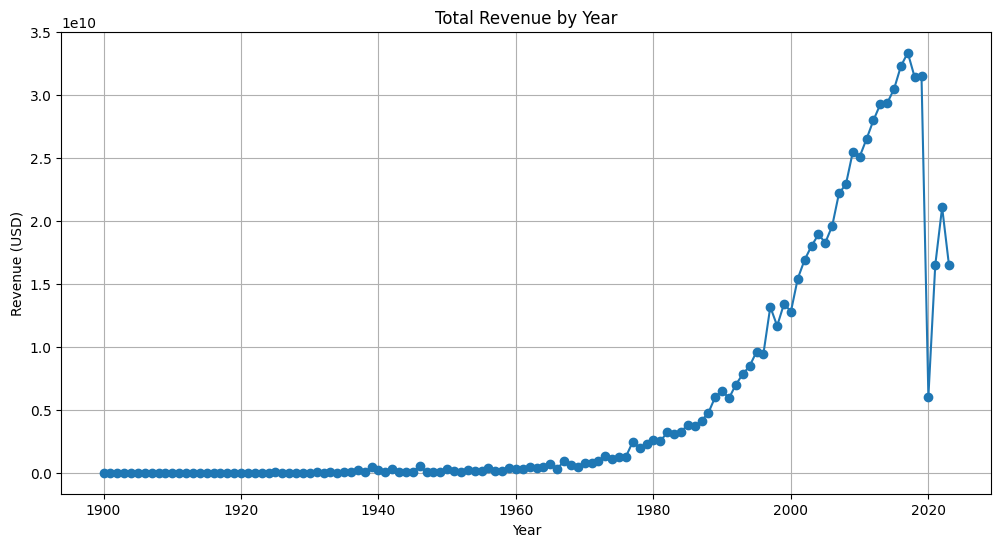

In [90]:
yearly_revenue = df.groupby('release_year')['revenue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.grid()
plt.show()


In [91]:
def is_successful_custom(vote_average, vote_count, popularity):
    # Custom scoring formula
    score = (0.6 * vote_average) + (0.3 * (vote_count / 100)) + (0.1 * popularity)
    
    # Threshold for success
    if score > 7.5:
        return 1
    else:
        return 0

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = df.dropna(subset=['vote_average'])  # Drop rows where the target is missing
df = df.dropna(subset=['genres'])
df['successful'] = df.apply(
    lambda row: is_successful_custom(row['vote_average'], row['vote_count'], row['popularity']),
    axis=1
)
# Drop unnecessary columns and handle missing values
X = df.drop(columns=['successful', 'vote_average', 'id', 'vote_count', 'title', 'overview', 'original_title', 'revenue', 'profit', 'status']) # Features
y = df['successful'] # Target

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

X = X.fillna(0)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
print(X.dtypes)
X.head()

runtime                   int64
adult                      bool
budget                    int64
imdb_id                   int64
original_language         int64
popularity              float64
genres                    int64
production_countries      int64
spoken_languages          int64
release_year            float64
release_month           float64
release_day             float64
dtype: object


,runtime,adult,budget,imdb_id,original_language,popularity,genres,production_countries,spoken_languages,release_year,release_month,release_day
0,148,False,160000000,29901,17,83.952,591,2668,805,2010.0,7.0,15.0
1,169,False,165000000,23738,17,140.241,938,2668,546,2014.0,11.0,5.0
2,152,False,185000000,22502,17,130.643,2492,2668,1165,2008.0,7.0,16.0
3,162,False,237000000,23196,17,79.932,145,2805,1283,2009.0,12.0,15.0
4,143,False,220000000,24008,17,98.082,4381,2694,996,2012.0,4.0,25.0


Number of unsuccessful movies (0): 44108
Number of successful movies (1): 5921


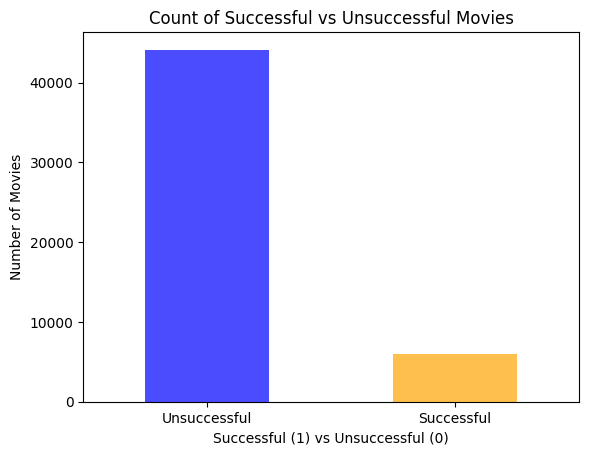

In [94]:
# Count the number of successful and unsuccessful movies
counts = y.value_counts()

# Display the counts
print("Number of unsuccessful movies (0):", counts[0])
print("Number of successful movies (1):", counts[1])

# Plot the counts as a bar chart
import matplotlib.pyplot as plt

counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Count of Successful vs Unsuccessful Movies")
plt.xlabel("Successful (1) vs Unsuccessful (0)")
plt.ylabel("Number of Movies")
plt.xticks(ticks=[0, 1], labels=['Unsuccessful', 'Successful'], rotation=0)
plt.show()


In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [97]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.5

y_pred_threshold = (y_proba >= threshold).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
report = classification_report(y_test, y_pred_threshold)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9486308215070958
Confusion Matrix:
[[8454  355]
 [ 159 1038]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      8809
           1       0.75      0.87      0.80      1197

    accuracy                           0.95     10006
   macro avg       0.86      0.91      0.89     10006
weighted avg       0.95      0.95      0.95     10006



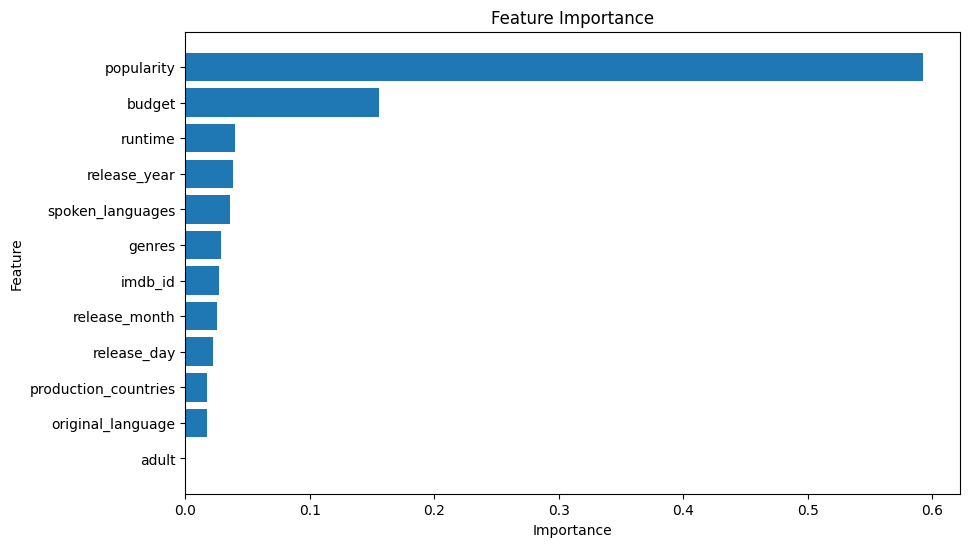

In [98]:
importances = model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Instantiate the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbc_model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(random_state=42)

In [103]:
# Predict on the test set
y_proba = gbc_model.predict_proba(X_test)[:, 1]
threshold = 0.5

y_pred_threshold = (y_proba >= threshold).astype(int)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_threshold)
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
report = classification_report(y_test, y_pred_threshold)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9445332800319808
Confusion Matrix:
[[8377  432]
 [ 123 1074]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      8809
           1       0.71      0.90      0.79      1197

    accuracy                           0.94     10006
   macro avg       0.85      0.92      0.88     10006
weighted avg       0.95      0.94      0.95     10006



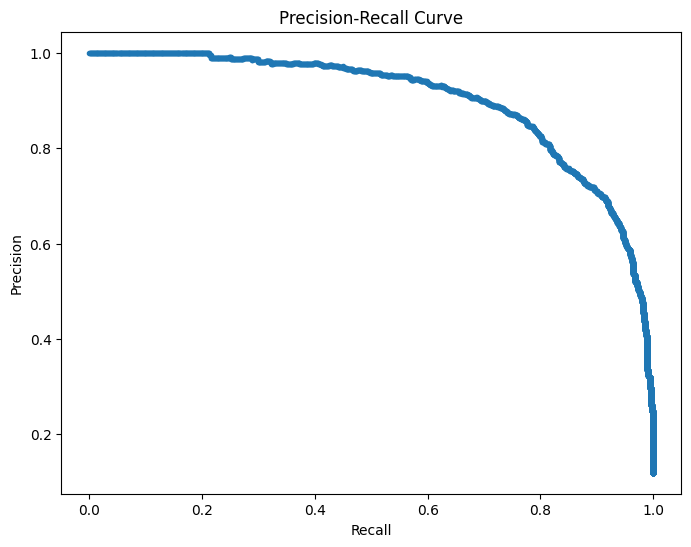

In [104]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()